##Cleaning Data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#discovering data
Employee_df = pd.read_excel("/content/Employee Sample Data - A.xlsx")
Employee_df.head(10)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57.0,2017-01-24,50994.0,0.00,China,Chongqing,NaT
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01,119746.0,0.10,United States,Phoenix,NaT
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,United States,Miami,2021-05-20
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29.0,2019-01-25,113527.0,0.06,United States,Austin,NaT
9,E03838,Madeline Walker,Sr. Analyst,Finance,Speciality Products,Female,Caucasian,34.0,2018-06-13,77203.0,0.00,United States,Chicago,NaT


In [3]:
#saving a copy
df = Employee_df.copy()

In [4]:
#show the null values
df.isnull().sum()

,0
EEID,0
Full Name,2
Job Title,1
Department,2
Business Unit,0
Gender,1
Ethnicity,7
Age,6
Hire Date,7
Annual Salary,11


In [5]:
df['Department'] = df['Department'].str.title()


In [6]:
#filling the null values with unknown
for col in ["Full Name","Job Title","Department","Gender","Ethnicity","Country","City"]:
    df[col] = df[col].fillna("Unknown")

In [7]:


df["Age"] = pd.to_numeric(df["Age"],errors="coerce") #making sure to convert the age to numeric data type
df['Age'] = df['Age'].fillna(df['Age'].median()) #filling the null values with the median


In [8]:
df["Annual Salary"] = pd.to_numeric(df["Annual Salary"],errors="coerce") #making sure to convert the salary to numeric data type
df= df.dropna(subset=['Annual Salary']) #dropping nul values

In [9]:
df["Bonus %"] = pd.to_numeric(df["Bonus %"], errors="coerce")  #making sure to convert the bonus to numeric data type
df["Bonus %"] = df["Bonus %"].fillna(df["Bonus %"].median())   #filling null values with median


In [10]:
#converting the data type to dateTime
df["Hire Date"] = pd.to_datetime(df["Hire Date"], errors="coerce").dt.date
df["Exit Date"] = pd.to_datetime(df["Exit Date"], errors="coerce").dt.date


In [11]:
df["still_employed"] = df["Exit Date"].isna()


In [12]:
df.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,still_employed
0,E02387,Emily Davis,Sr. Manger,It,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16,False
1,E04105,Theodore Dinh,Technical Architect,It,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT,True
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT,True
3,E02832,Penelope Jordan,Computer Systems Manager,It,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT,True
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT,True


In [13]:
#dropping duplicates
df.drop_duplicates(inplace=True)


In [14]:
print("Rows after cleaning:", df.shape)
df.head()

Rows after cleaning: (989, 15)


,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,still_employed
0,E02387,Emily Davis,Sr. Manger,It,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16,False
1,E04105,Theodore Dinh,Technical Architect,It,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT,True
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT,True
3,E02832,Penelope Jordan,Computer Systems Manager,It,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT,True
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT,True


In [15]:
#Modifying the first 5 rows
df.loc[:4, "Age"] = [30, 23, 22, 35, 21]
df.loc[:4, "Annual Salary"] = [50000, 20000, 25000, 45000,50000]
df.loc[:4, "Department"] = ["It", "Engineering", "Sales", "Marketing", "It"]


In [16]:
df.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,still_employed
0,E02387,Emily Davis,Sr. Manger,It,Research & Development,Female,Black,30.0,2016-04-08,50000.0,0.15,United States,Seattle,2021-10-16,False
1,E04105,Theodore Dinh,Technical Architect,Engineering,Manufacturing,Male,Asian,23.0,1997-11-29,20000.0,0.00,China,Chongqing,NaT,True
2,E02572,Luna Sanders,Director,Sales,Speciality Products,Female,Caucasian,22.0,2006-10-26,25000.0,0.20,United States,Chicago,NaT,True
3,E02832,Penelope Jordan,Computer Systems Manager,Marketing,Manufacturing,Female,Caucasian,35.0,2019-09-27,45000.0,0.07,United States,Chicago,NaT,True
4,E01639,Austin Vo,Sr. Analyst,It,Manufacturing,Male,Asian,21.0,1995-11-20,50000.0,0.00,United States,Phoenix,NaT,True


In [17]:
#row with the largest salary
largest_salary_row = df[df["Annual Salary"] == df["Annual Salary"].max()]
print("Row with the largest salary:")
print(largest_salary_row)

Row with the largest salary:
       EEID     Full Name       Job Title Department  Business Unit  Gender  \
989  E04354  Raelynn Rios  Vice President      Sales  Manufacturing  Female   

    Ethnicity   Age   Hire Date  Annual Salary  Bonus %        Country  \
989    Latino  43.0  2016-08-21       258498.0     0.35  United States   

         City Exit Date  still_employed  
989  Columbus       NaT            True  


In [18]:
#group by department column
groupby_dept = df.groupby("Department").agg(
    Avg_Age = ("Age", "mean"),
    Avg_Salary = ("Annual Salary", "mean"),
).reset_index()

In [19]:
groupby_dept["Avg_Age"] = groupby_dept["Avg_Age"].round(0)
groupby_dept["Avg_Salary"] = groupby_dept["Avg_Salary"].round(2)

In [20]:
display(groupby_dept)

,Department,Avg_Age,Avg_Salary
0,Accounting,44.0,123146.95
1,Engineering,46.0,108800.79
2,Finance,45.0,123105.02
3,Human Resources,44.0,118256.93
4,It,44.0,97415.13
5,Marketing,43.0,128963.34
6,Sales,43.0,110609.44
7,Unknown,45.0,66902.50


In [21]:
#group by department and ethnicity
groupby_dept_ethnicity = df.groupby(["Department", "Ethnicity"]).agg(
    Max_Age = ("Age", "max"),
    Min_Age = ("Age", "min"),
    Median_Salary = ("Annual Salary", "median"),
).reset_index()

print("Max Age, Min Age, and Median Salary by Department & Ethnicity:")
display(groupby_dept_ethnicity)


Max Age, Min Age, and Median Salary by Department & Ethnicity:


,Department,Ethnicity,Max_Age,Min_Age,Median_Salary
0,Accounting,Asian,64.0,25.0,114893.0
1,Accounting,Black,51.0,30.0,91853.0
2,Accounting,Caucasian,62.0,26.0,121159.5
3,Accounting,Latino,62.0,26.0,92317.0
4,Engineering,Asian,65.0,23.0,90678.0
5,Engineering,Black,56.0,27.0,74412.0
6,Engineering,Caucasian,64.0,25.0,91621.0
7,Engineering,Latino,64.0,27.0,96818.0
8,Finance,Asian,64.0,25.0,125329.0
9,Finance,Black,65.0,25.0,131652.0


In [22]:
df.isnull().sum()

,0
EEID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,0
Annual Salary,0


In [23]:
#making sure that ID is string data type
df["EEID"] = df["EEID"].astype(str)


In [24]:
#making consistency in columns that have string values
df["Department"] = df["Department"].str.title().str.strip()
df["City"] = df["City"].str.title().str.strip()


In [25]:
df = df[(df["Age"] >= 18) & (df["Age"] <= 70)]


In [26]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,still_employed
0,E02387,Emily Davis,Sr. Manger,It,Research & Development,Female,Black,30.0,2016-04-08,50000.0,0.15,United States,Seattle,2021-10-16,False
1,E04105,Theodore Dinh,Technical Architect,Engineering,Manufacturing,Male,Asian,23.0,1997-11-29,20000.0,0.00,China,Chongqing,NaT,True
2,E02572,Luna Sanders,Director,Sales,Speciality Products,Female,Caucasian,22.0,2006-10-26,25000.0,0.20,United States,Chicago,NaT,True
3,E02832,Penelope Jordan,Computer Systems Manager,Marketing,Manufacturing,Female,Caucasian,35.0,2019-09-27,45000.0,0.07,United States,Chicago,NaT,True
4,E01639,Austin Vo,Sr. Analyst,It,Manufacturing,Male,Asian,21.0,1995-11-20,50000.0,0.00,United States,Phoenix,NaT,True


In [27]:
#new column that contains the difference between Hire date and Exit date
df["Hire Date"] = pd.to_datetime(df["Hire Date"], errors="coerce")
df["Exit Date"] = pd.to_datetime(df["Exit Date"], errors="coerce")

today = pd.Timestamp.today()
df["Tenure (Days)"] = (df["Exit Date"].fillna(today) - df["Hire Date"]).dt.days
df["Tenure (Years)"] = (df["Tenure (Days)"] / 365).round(1)


In [28]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,still_employed,Tenure (Days),Tenure (Years)
0,E02387,Emily Davis,Sr. Manger,It,Research & Development,Female,Black,30.0,2016-04-08,50000.0,0.15,United States,Seattle,2021-10-16,False,2017,5.5
1,E04105,Theodore Dinh,Technical Architect,Engineering,Manufacturing,Male,Asian,23.0,1997-11-29,20000.0,0.00,China,Chongqing,NaT,True,10150,27.8
2,E02572,Luna Sanders,Director,Sales,Speciality Products,Female,Caucasian,22.0,2006-10-26,25000.0,0.20,United States,Chicago,NaT,True,6897,18.9
3,E02832,Penelope Jordan,Computer Systems Manager,Marketing,Manufacturing,Female,Caucasian,35.0,2019-09-27,45000.0,0.07,United States,Chicago,NaT,True,2178,6.0
4,E01639,Austin Vo,Sr. Analyst,It,Manufacturing,Male,Asian,21.0,1995-11-20,50000.0,0.00,United States,Phoenix,NaT,True,10890,29.8


In [29]:
#saving file
with pd.ExcelWriter("Employee_Cleaned_Analysis.xlsx", engine="openpyxl", datetime_format="YYYY-MM-DD") as writer:
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)
    groupby_dept.to_excel(writer, sheet_name="Dept Summary", index=False)
    groupby_dept_ethnicity.to_excel(writer, sheet_name="Dept+Ethnicity Summary", index=False)

print("✅ File saved as Employee_Cleaned_Analysis.xlsx")




✅ File saved as Employee_Cleaned_Analysis.xlsx


In [30]:
from google.colab import files

files.download("Employee_Cleaned_Analysis.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Analyzing Data


In [31]:
df = pd.read_excel("/content/Employee_Cleaned_Analysis.xlsx", sheet_name="Cleaned Data")


In [32]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

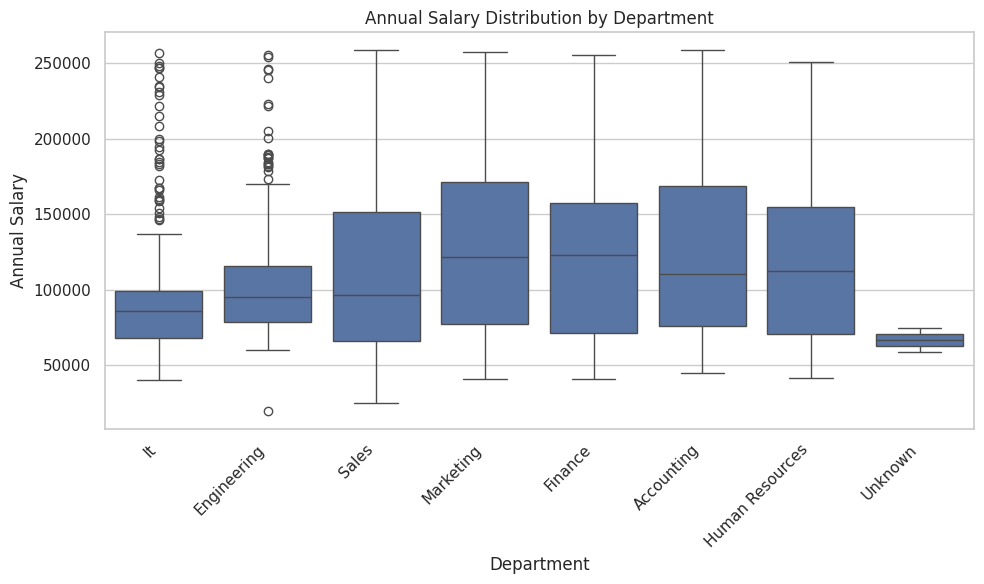

In [33]:
#Annual Salary by Department (Boxplot)
plt.figure()
sns.boxplot(x="Department", y="Annual Salary", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Annual Salary Distribution by Department")
plt.tight_layout()
plt.show()

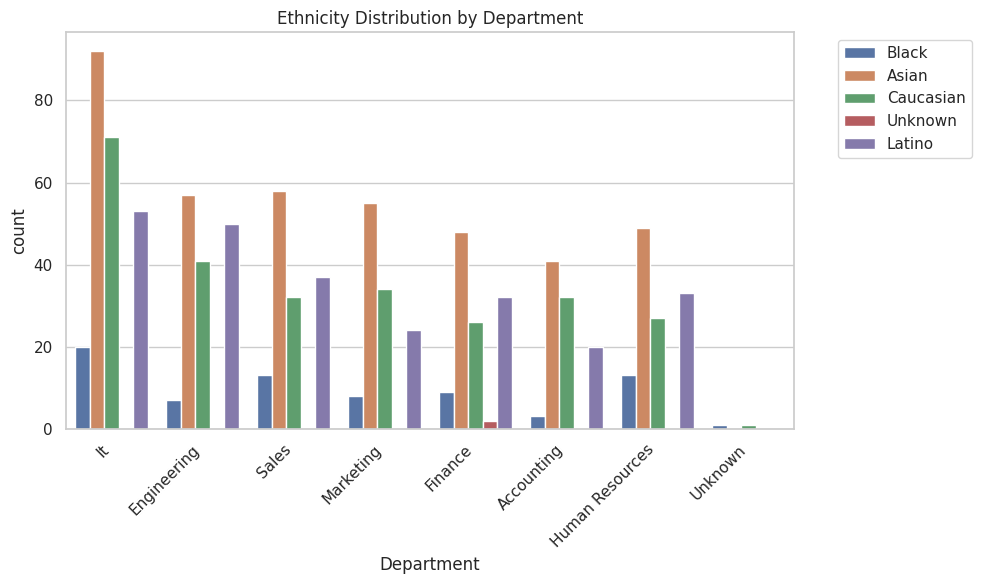

In [34]:
#Ethnicity in Each Department (Countplot)
plt.figure()
sns.countplot(x="Department", hue="Ethnicity", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Ethnicity Distribution by Department")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


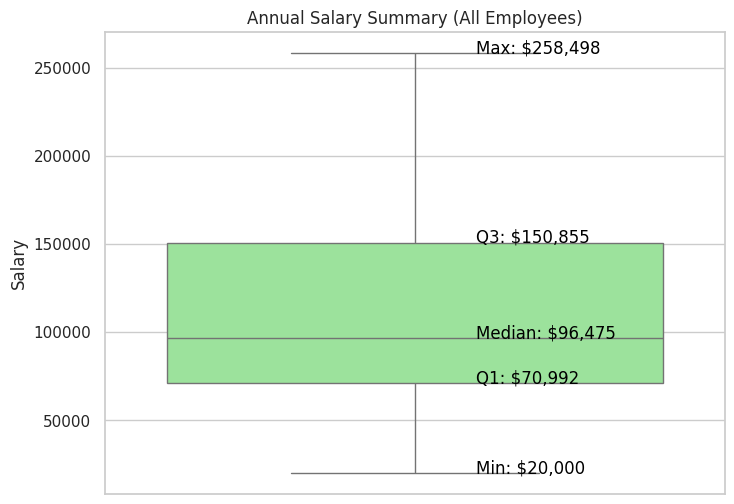

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(y="Annual Salary", data=df, color='lightgreen')

# Extract statistics
stats = df["Annual Salary"].describe()
plt.text(0.1, stats['25%'], f"Q1: ${stats['25%']:,.0f}", color='black')
plt.text(0.1, stats['50%'], f"Median: ${stats['50%']:,.0f}", color='black')
plt.text(0.1, stats['75%'], f"Q3: ${stats['75%']:,.0f}", color='black')
plt.text(0.1, stats['min'], f"Min: ${stats['min']:,.0f}", color='black')
plt.text(0.1, stats['max'], f"Max: ${stats['max']:,.0f}", color='black')

plt.title("Annual Salary Summary (All Employees)")
plt.ylabel("Salary")
plt.show()


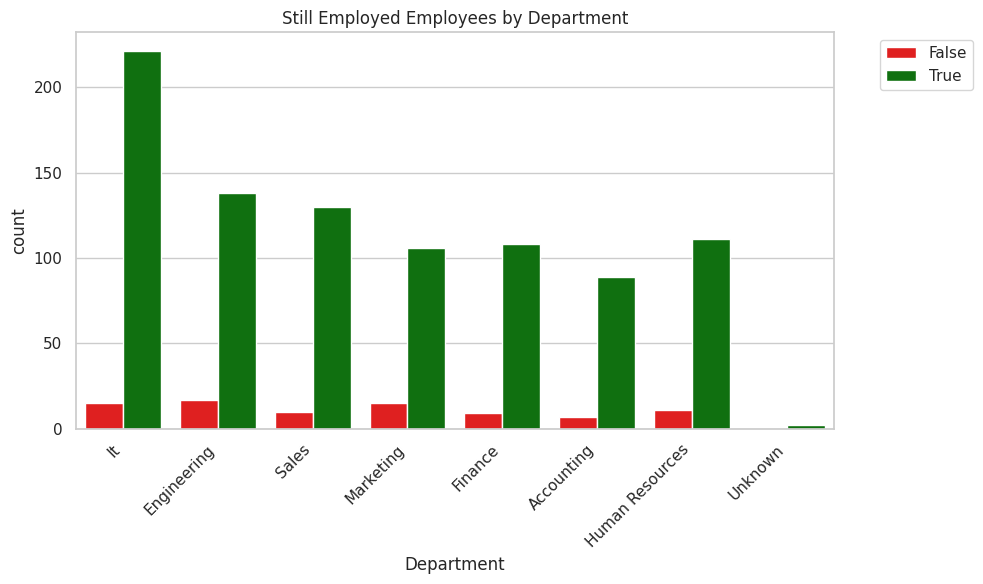

In [36]:
#Still Employed by Department
df_filtered = df[df['Department'] != 'unknown']
colors = {True: "green", False: "red"}
plt.figure()
sns.countplot(x="Department", hue="still_employed", data=df_filtered, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Still Employed Employees by Department")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

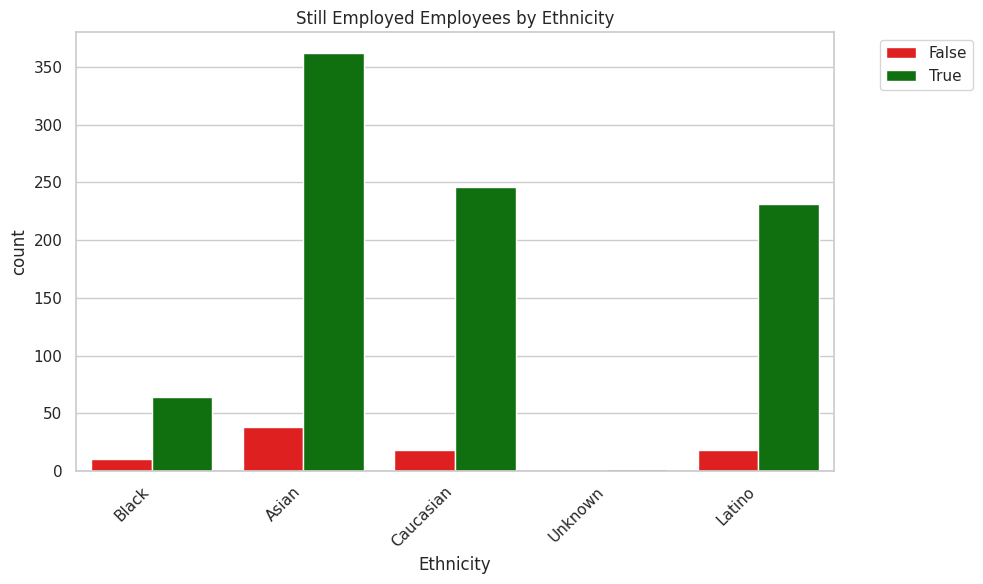

In [37]:
#still employed by Ethnicity
df_filtered = df[df['Department'] != 'unknown']
colors = {True: "green", False: "red"}
plt.figure()
sns.countplot(x="Ethnicity", hue="still_employed", data=df_filtered, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Still Employed Employees by Ethnicity")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

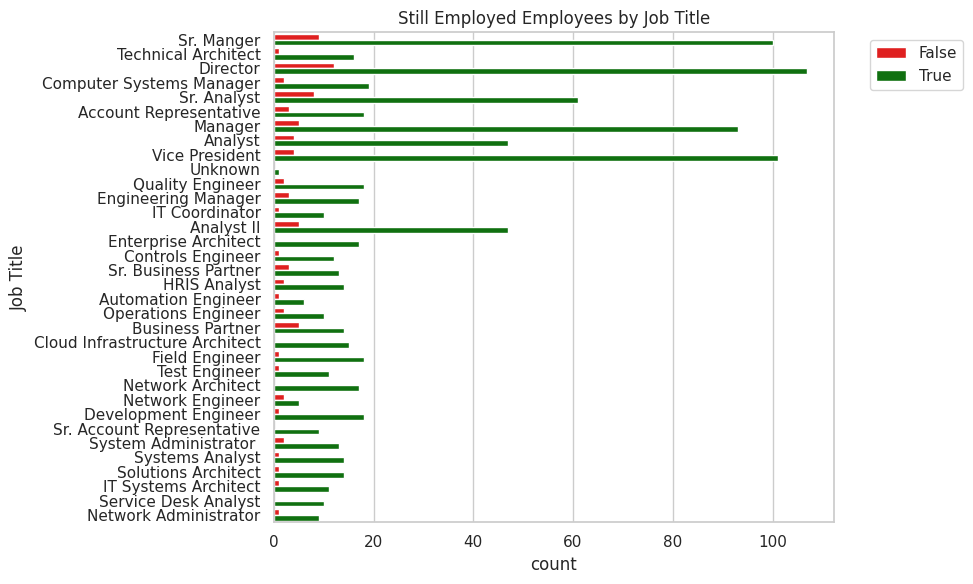

In [38]:
# Example: by Job Title
plt.figure()
colors = {True: "green", False: "red"}

sns.countplot(y="Job Title", hue="still_employed", data=df, palette = colors)
plt.title("Still Employed Employees by Job Title")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

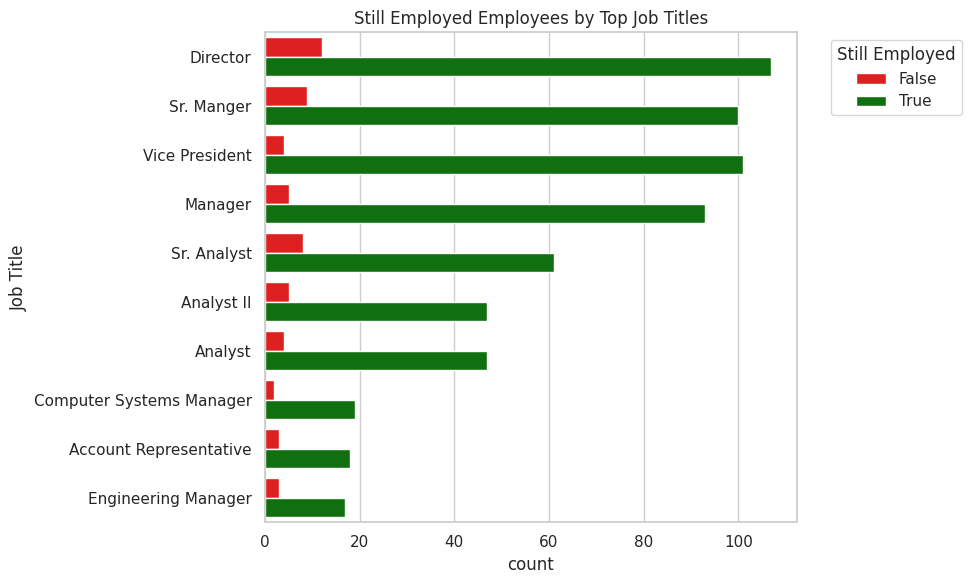

In [39]:
# Remove unknowns from Job Title
df_filtered = df[df['Job Title'] != 'unknown']

# Get top 10 most common job titles
top_jobs = df_filtered['Job Title'].value_counts().nlargest(10).index
df_top = df_filtered[df_filtered['Job Title'].isin(top_jobs)]

# Define custom colors for True/False
colors = {True: 'green', False: 'red'}

plt.figure(figsize=(10,6))
sns.countplot(
    y="Job Title",
    hue="still_employed",
    data=df_top,
    palette=colors,
    order=df_top['Job Title'].value_counts().index
)
plt.title("Still Employed Employees by Top Job Titles")
plt.legend(title='Still Employed', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

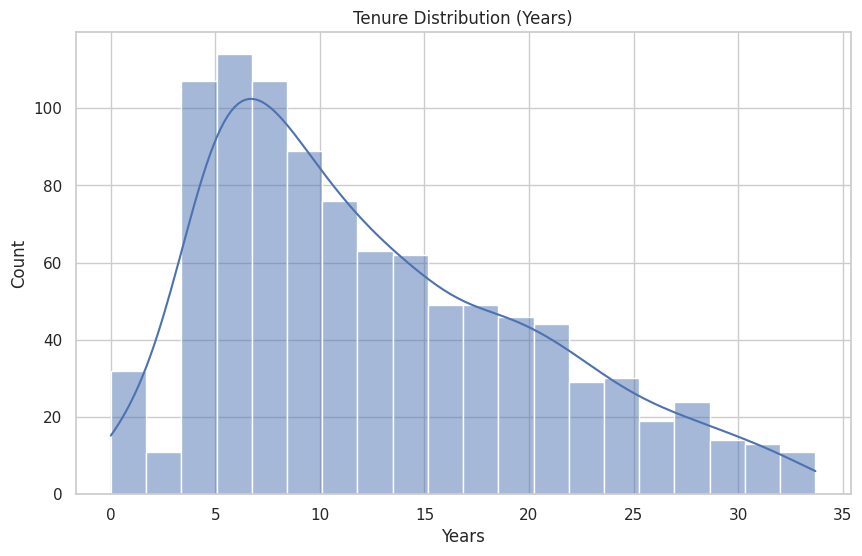

In [40]:
#Tenure Distribution (Days and Years)
plt.figure()
sns.histplot(df["Tenure (Years)"], bins=20, kde=True)
plt.title("Tenure Distribution (Years)")
plt.xlabel("Years")
plt.show()

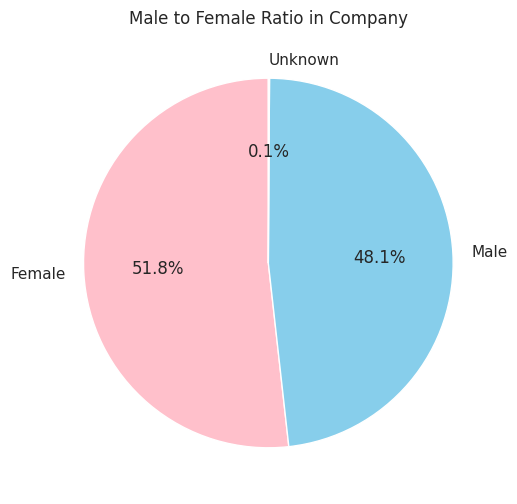

In [41]:
#Male to Female Ratio
plt.figure()
gender_counts = df["Gender"].value_counts()
pie_colors = ['pink', 'skyblue']
plt.pie(gender_counts, labels=gender_counts.index, colors = pie_colors, autopct='%1.1f%%', startangle=90)
plt.title("Male to Female Ratio in Company")
plt.show()

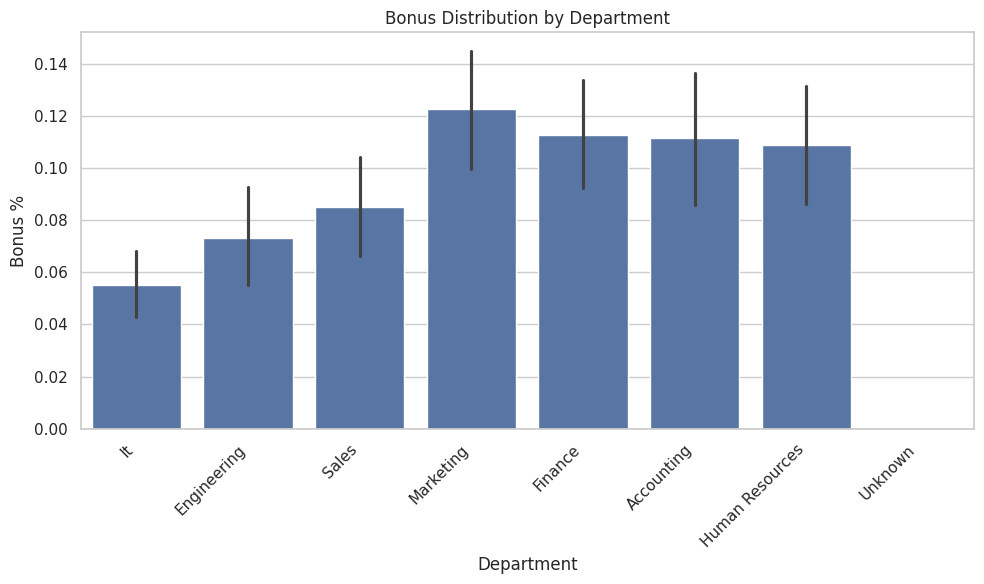

In [42]:
#Bonus Distribution by Department
plt.figure()
sns.barplot(x="Department", y="Bonus %", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Bonus Distribution by Department")
plt.tight_layout()
plt.show()


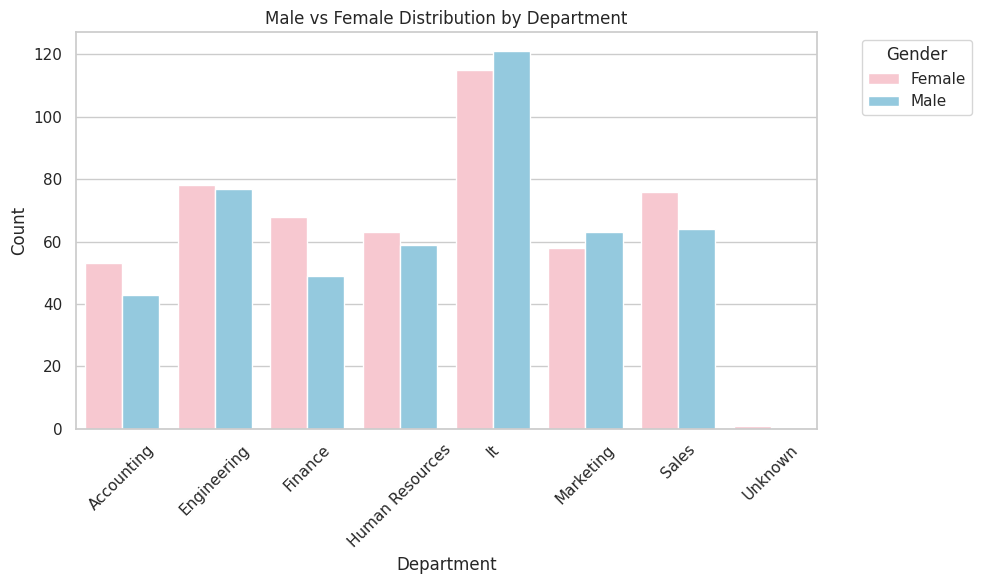

In [43]:
# Count employees by Department and Gender

gender_counts = df.groupby(['Department', 'Gender']).size().reset_index(name='Count')

gender_counts = gender_counts[gender_counts['Gender'] != 'Unknown']
# Plot - Count
plt.figure(figsize=(10,6))
gender_colors = {'Female': 'pink', 'Male': 'skyblue'}
sns.barplot(data=gender_counts, x='Department', y='Count', hue='Gender', palette= gender_colors)
plt.xticks(rotation=45)
plt.title("Male vs Female Distribution by Department")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

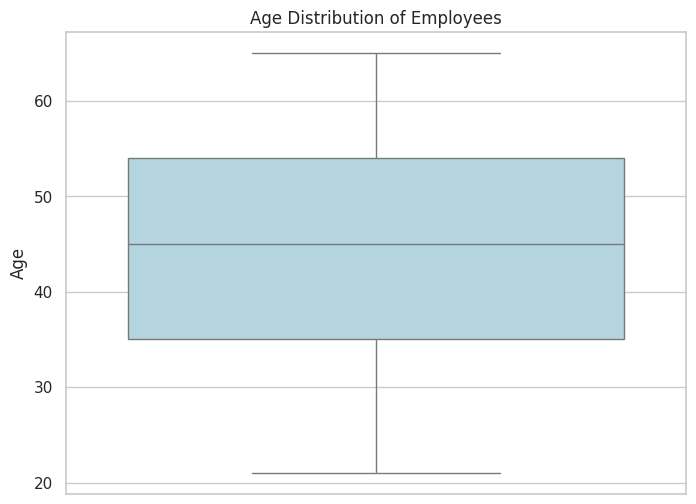

In [44]:

plt.figure(figsize=(8,6))
sns.boxplot(y='Age', data=df, color='lightblue')
plt.title("Age Distribution of Employees")
plt.ylabel("Age")
plt.show()


/tmp/ipython-input-3662840563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, y='Country', order=country_order, palette='pastel')


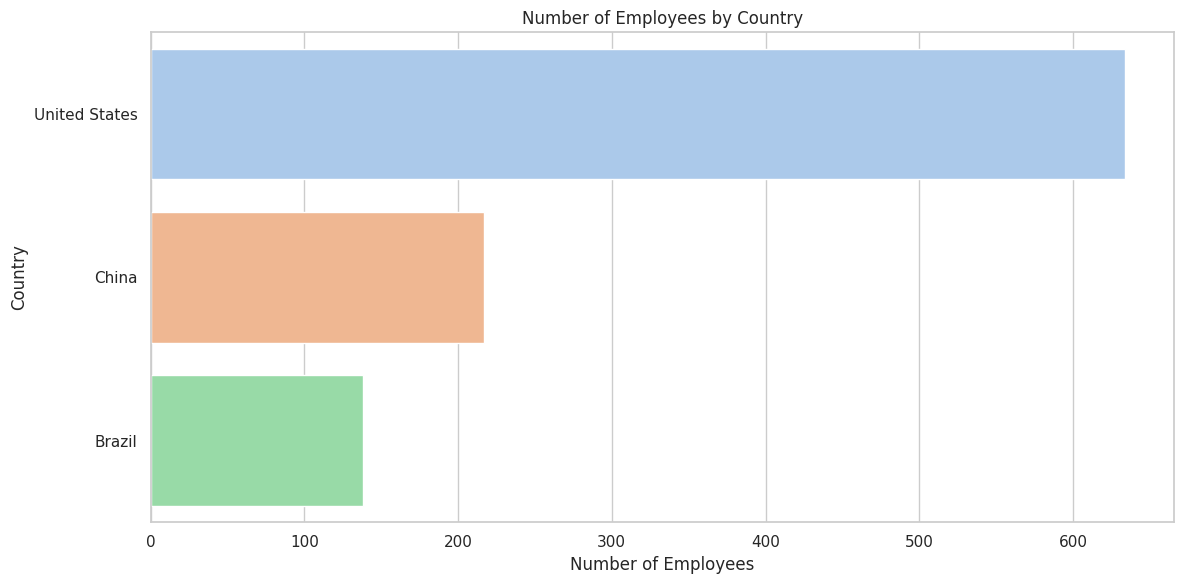

In [45]:


# Remove unknown or missing values
df_filtered = df[df['Country'] != 'unknown']

# Order by counts descending
country_order = df_filtered['Country'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(data=df_filtered, y='Country', order=country_order, palette='pastel')
plt.title("Number of Employees by Country")
plt.xlabel("Number of Employees")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
